In [82]:
import numpy as np
# import pandas as pd
# import sqlite3 as sql
# import os
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.graph_objs as go
from dotenv import load_dotenv
import sys
sys.path.insert(0, '../data_prep')
from sqlite_utils import select_statement_to_df

In [83]:
load_dotenv()

True

In [84]:
eligible_watchlist_query = """

WITH BASE_TABLE AS (

	SELECT
	
		 a.FILM_ID
		,c.FILM_TITLE
		,d.FILM_GENRE
		,e.FILM_RATING
		,f.FILM_RATING_SCALED
		,CASE WHEN f.FILM_RATING_SCALED IS NOT NULL THEN 1 ELSE 0 END AS RATED
	
	FROM ALL_FILMS a
	LEFT JOIN CONTENT_TYPE b
	ON a.FILM_ID = b.FILM_ID
	LEFT JOIN FILM_TITLE c
	ON a.FILM_ID = c.FILM_ID
	LEFT JOIN FILM_GENRE d
	ON a.FILM_ID = d.FILM_ID
	LEFT JOIN FILM_LETTERBOXD_STATS e
	ON a.FILM_ID = e.FILM_ID
	LEFT JOIN PERSONAL_RATING f
	ON a.FILM_ID = f.FILM_ID
	
	WHERE CONTENT_TYPE = 'movie'
	
	)
    
, GENRE_SCORE AS (

	SELECT

		 FILM_GENRE
		,AVG(FILM_RATING) AS MEAN_RATING
		,AVG(FILM_RATING_SCALED) AS MY_MEAN_RATING
		,AVG(FILM_RATING_SCALED) - AVG(FILM_RATING) AS MY_VARIANCE
		,((AVG(FILM_RATING_SCALED) - AVG(FILM_RATING)) * ((SUM(RATED)+0.0)/COUNT(*))) AS VARIANCE_SCORE
		,COUNT(*) AS FILM_COUNT
		,SUM(RATED) AS RATED_FILM_COUNT
		,(SUM(RATED)+0.0)/COUNT(*) AS SCALER

	FROM BASE_TABLE

	GROUP BY FILM_GENRE

)


SELECT
	 a.FILM_ID
	,b.FILM_TITLE
    ,a.SEEN
	,c.FILM_WATCH_COUNT
	,c.FILM_TOP_250
	,c.FILM_RATING
	,c.FILM_LIKES_COUNT
	,c.FILM_FAN_COUNT
	,CASE WHEN d.FILM_ID IS NULL THEN 'No' ELSE 'Yes' END AS STREAMING
	,e.FILM_RUNTIME
	,g.FILM_GENRE
    ,COALESCE(i.VARIANCE_SCORE, 0) AS GENRE_SCORE

FROM EXPANDED_WATCHLIST a
LEFT JOIN FILM_TITLE b
ON a.FILM_ID = b.FILM_ID
LEFT JOIN FILM_LETTERBOXD_STATS c
ON a.FILM_ID = c.FILM_ID
LEFT JOIN FILMS_AVAILABLE_TO_STREAM d
ON a.FILM_ID = d.FILM_ID
LEFT JOIN FILM_RUNTIME e
ON a.FILM_ID = e.FILM_ID
LEFT JOIN CONTENT_TYPE f
ON a.FILM_ID = f.FILM_ID
LEFT JOIN FILM_GENRE g
ON a.FILM_ID = g.FILM_ID
LEFT JOIN FILM_RELEASE_INFO h
ON a.FILM_ID = h.FILM_ID
LEFT JOIN GENRE_SCORE i
ON g.FILM_GENRE = i.FILM_GENRE

WHERE f.CONTENT_TYPE = 'movie'
AND h.FILM_STATUS = 'Released'
AND a.FILM_ID != 'f_08E3a'
AND e.FILM_RUNTIME < 300
AND e.FILM_RUNTIME > 59
AND d.FILM_ID IS NOT NULL
AND g.FILM_GENRE != 'tv-movie'
AND g.FILM_GENRE != 'documentary'
"""

In [85]:
df = select_statement_to_df(eligible_watchlist_query)

In [86]:
df.sort_values('FILM_RUNTIME', ascending=True).head(25)

,FILM_ID,FILM_TITLE,SEEN,FILM_WATCH_COUNT,FILM_TOP_250,FILM_RATING,FILM_LIKES_COUNT,FILM_FAN_COUNT,STREAMING,FILM_RUNTIME,FILM_GENRE,GENRE_SCORE
1082,f_0mqQU,The Great Buddha: Arrival,0,117,NaN,3.13,29,0,Yes,60,science-fiction,0.054542
227,f_01sPi,Attack of the Crab Monsters,0,3780,NaN,2.57,596,2,Yes,63,horror,0.044684
641,f_068K8,The McPherson Tape,0,7677,NaN,2.79,1672,6,Yes,63,horror,0.044684
1223,f_027Gc,The Most Dangerous Game,0,20918,NaN,3.37,4110,4,Yes,63,action,0.038020
1958,f_01U2o,Dumbo,1,379539,NaN,3.35,41454,207,Yes,64,animation,0.023564
69,f_01Gq2,Attack of the 50 Foot Woman,0,8487,NaN,2.48,1099,4,Yes,65,science-fiction,0.054542
1276,f_01svs,The Walking Dead,0,9425,NaN,3.45,507,1,Yes,66,crime,-0.004879
1330,f_02ZGU,The White Reindeer,0,4820,NaN,3.51,1106,5,Yes,68,horror,0.044684
583,f_01Hgi,Lady and the Tramp II: Scamp's Adventure,0,43413,NaN,2.69,2676,18,Yes,69,adventure,0.030197
343,f_01aum,Bride of the Monster,0,5827,NaN,2.32,829,4,Yes,69,horror,0.044684


In [87]:
def scale_col(df, column, suffix='', a=0, b=1):
    col_min = df[column].min()
    col_max = df[column].max()
    col_range = (col_max - col_min)
    df[column+suffix] = ((df[column] - col_min) / col_range) * (b - a) + a
    return df

In [102]:
df_scaled = df.copy()
df_scaled['FILM_TOP_250'] = np.where(df_scaled['FILM_TOP_250'].notnull(), 1, 0)
df_scaled['FILM_RUNTIME'] = 1 / df_scaled['FILM_RUNTIME']
df_scaled['FILM_RATING'] = df_scaled['FILM_RATING'].fillna(df_scaled['FILM_RATING'].mean())
df_scaled['SEEN_SCORE'] = np.where(df_scaled['SEEN']==1, 0, 1)
df_scaled = scale_col(df_scaled, 'FILM_WATCH_COUNT')
df_scaled = scale_col(df_scaled, 'FILM_RATING')
df_scaled = scale_col(df_scaled, 'FILM_LIKES_COUNT')
df_scaled = scale_col(df_scaled, 'FILM_FAN_COUNT')
df_scaled = scale_col(df_scaled, 'FILM_RUNTIME')
df_scaled = scale_col(df_scaled, 'GENRE_SCORE')
df_scaled.sort_values('FILM_TOP_250')

,FILM_ID,FILM_TITLE,SEEN,FILM_WATCH_COUNT,FILM_TOP_250,FILM_RATING,FILM_LIKES_COUNT,FILM_FAN_COUNT,STREAMING,FILM_RUNTIME,FILM_GENRE,GENRE_SCORE,SEEN_SCORE
0,f_01WVK,The Lawnmower Man,0,0.012781,0,0.414414,0.003105,0.000369,Yes,0.397765,horror,0.932276,1
1332,f_0cvbi,The Other Side of the Door,0,0.003298,0,0.336336,0.000434,0.000000,Yes,0.491864,horror,0.932276,1
1331,f_00JVg,The Shrine,0,0.002446,0,0.453453,0.000544,0.000010,Yes,0.601462,horror,0.932276,1
1330,f_02ZGU,The White Reindeer,0,0.002097,0,0.723724,0.001100,0.000051,Yes,0.840585,horror,0.932276,1
1329,f_04Vu0,Jug Face,0,0.003110,0,0.504505,0.001022,0.000010,Yes,0.648696,horror,0.932276,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,f_006ZS,Apocalypse Now,1,0.264904,1,0.978979,0.202919,0.173670,Yes,0.198044,war,0.751937,0
603,f_029DO,The Passion of Joan of Arc,0,0.044619,1,0.975976,0.033144,0.016555,Yes,0.636455,history,0.595843,1
709,f_01q6K,A Matter of Life and Death,0,0.015501,1,0.927928,0.011921,0.005071,Yes,0.426718,comedy,0.387290,1
1442,f_02b8y,Taxi Driver,1,0.544732,1,0.924925,0.449388,0.319866,Yes,0.358144,drama,0.695815,0


In [105]:
df_scaled['SCORE_BASIC'] =                         \
      df_scaled['SEEN_SCORE']       * 1      \
    + df_scaled['FILM_WATCH_COUNT'] * 1      \
    + df_scaled['FILM_TOP_250']     * 1      \
    + df_scaled['FILM_RATING']      * 1      \
    + df_scaled['FILM_FAN_COUNT']   * 1      \
    + df_scaled['FILM_RUNTIME']     * 1      \
    + df_scaled['GENRE_SCORE']      * 1      \
    
df_scaled = scale_col(df_scaled, 'SCORE_BASIC', a=0, b=100)

In [106]:
df_scaled['SCORE_WEIGHTED'] =                         \
      df_scaled['SEEN_SCORE']       * 3      \
    + df_scaled['FILM_WATCH_COUNT'] * 2      \
    + df_scaled['FILM_TOP_250']     * 1      \
    + df_scaled['FILM_RATING']      * 2      \
    + df_scaled['FILM_FAN_COUNT']   * 1      \
    + df_scaled['FILM_RUNTIME']     * 2      \
    + df_scaled['GENRE_SCORE']      * 2      \
    
df_scaled = scale_col(df_scaled, 'SCORE_WEIGHTED', a=0, b=100)
df_scaled.sort_values('SCORE_WEIGHTED', ascending=False).head(10)

,FILM_ID,FILM_TITLE,SEEN,FILM_WATCH_COUNT,FILM_TOP_250,FILM_RATING,FILM_LIKES_COUNT,FILM_FAN_COUNT,STREAMING,FILM_RUNTIME,FILM_GENRE,GENRE_SCORE,SEEN_SCORE,SCORE_BASIC,SCORE_WEIGHTED
603,f_029DO,The Passion of Joan of Arc,0,0.044619,1,0.975976,0.033144,0.016555,Yes,0.636455,history,0.595843,1,83.551767,100.000000
49,f_01KnQ,Fantastic Planet,0,0.065812,0,0.864865,0.053648,0.025672,Yes,0.774162,science-fiction,1.000000,1,71.034250,98.788242
39,f_01UlA,Cinema Paradiso,0,0.108842,1,0.984985,0.096943,0.122982,Yes,0.300630,drama,0.695815,1,82.246565,96.952005
1173,f_08LnQ,Evangelion: 3.0+1.0 Thrice Upon a Time,0,0.030392,1,0.936937,0.031174,0.018860,Yes,0.169498,science-fiction,1.000000,1,80.909500,96.798621
702,f_01NyM,Ugetsu,0,0.022045,1,0.921922,0.015333,0.003534,Yes,0.491864,drama,0.695815,1,80.433215,96.440813
1082,f_0mqQU,The Great Buddha: Arrival,0,0.000045,0,0.609610,0.000028,0.000000,Yes,1.000000,science-fiction,1.000000,1,68.227224,95.778945
9,f_0dYmm,Call Me by Your Name,0,0.598754,0,0.849850,0.518783,0.377909,Yes,0.260893,drama,0.695815,1,72.258505,95.350222
1355,f_01F7e,Nights of Cabiria,0,0.026491,1,0.954955,0.021370,0.013379,Yes,0.384077,drama,0.695815,1,79.028893,94.619265
1223,f_027Gc,The Most Dangerous Game,0,0.009118,0,0.681682,0.004089,0.000041,Yes,0.935475,action,0.886495,1,65.977891,93.080408
942,f_01IRY,The Battle of Algiers,0,0.031829,1,0.954955,0.022310,0.009261,Yes,0.316886,drama,0.695815,1,77.496617,92.838738


<Axes: xlabel='FILM_RUNTIME', ylabel='FILM_RATING'>

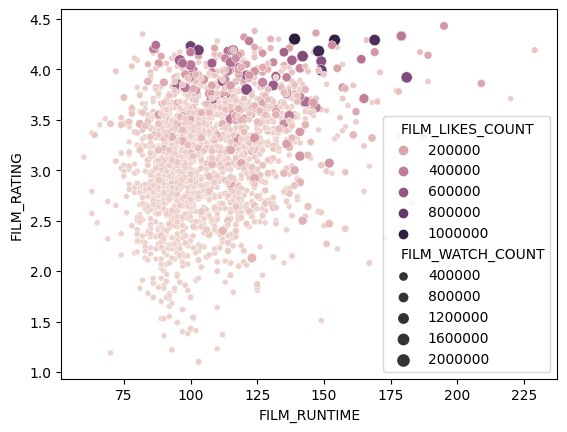

In [107]:
sns.scatterplot(data=df, x='FILM_RUNTIME', y='FILM_RATING', size='FILM_WATCH_COUNT', hue='FILM_LIKES_COUNT')

<Axes: xlabel='SCORE_BASIC', ylabel='SCORE_WEIGHTED'>

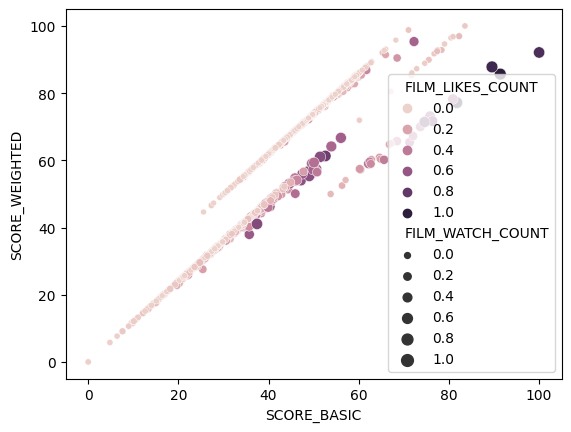

In [108]:
sns.scatterplot(data=df_scaled, x='SCORE_BASIC', y='SCORE_WEIGHTED', size='FILM_WATCH_COUNT', hue='FILM_LIKES_COUNT')

<Axes: xlabel='SCORE_WEIGHTED', ylabel='FILM_LIKES_COUNT'>

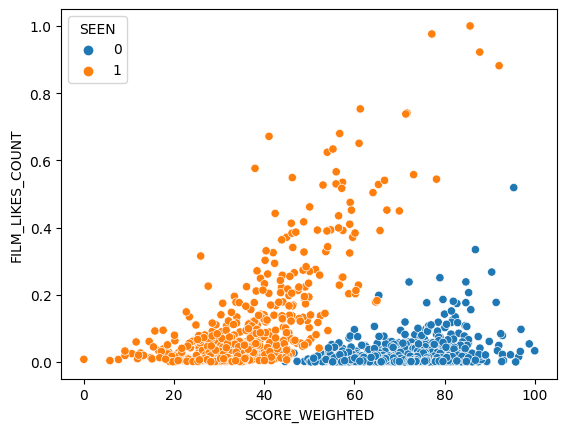

In [111]:
sns.scatterplot(data=df_scaled, x='SCORE_WEIGHTED', y='FILM_LIKES_COUNT', hue='SEEN')

<Axes: xlabel='FILM_RUNTIME', ylabel='FILM_WATCH_COUNT'>

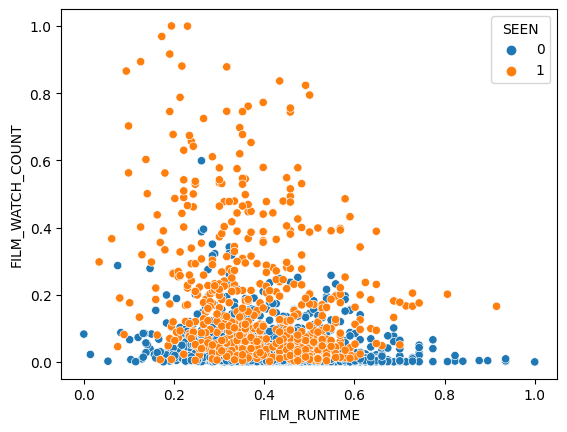

In [112]:
sns.scatterplot(data=df_scaled, x='FILM_RUNTIME', y='FILM_WATCH_COUNT', hue='SEEN')

In [120]:
df_scaled.sort_values('FILM_WATCH_COUNT', ascending=False).head(20)

,FILM_ID,FILM_TITLE,SEEN,FILM_WATCH_COUNT,FILM_TOP_250,FILM_RATING,FILM_LIKES_COUNT,FILM_FAN_COUNT,STREAMING,FILM_RUNTIME,FILM_GENRE,GENRE_SCORE,SEEN_SCORE,SCORE_BASIC,SCORE_WEIGHTED
1453,f_01skk,Inception,1,1.000000,1,0.924925,0.922156,0.408345,Yes,0.194307,science-fiction,1.000000,0,89.547126,87.804339
1441,f_02a9q,Fight Club,1,0.999376,1,0.960961,1.000000,0.720804,Yes,0.229875,drama,0.695815,0,91.387903,85.659895
1435,f_029Pq,Pulp Fiction,1,0.968674,1,0.957958,0.976009,0.500840,Yes,0.172904,crime,0.591790,0,81.756798,77.171814
1476,f_09vEe,Avengers: Infinity War,1,0.916343,0,0.867868,0.753082,0.129128,Yes,0.190620,adventure,0.832756,0,52.597351,61.303582
1468,f_04VZ8,Interstellar,1,0.893618,1,0.957958,0.881585,1.000000,Yes,0.126046,science-fiction,1.000000,0,100.000000,92.100658
1897,f_00728,Forrest Gump,1,0.880540,0,0.909910,0.671426,0.276072,Yes,0.217518,romance,0.000000,0,37.438123,41.073986
1477,f_03VH2,Guardians of the Galaxy,1,0.878163,0,0.810811,0.650736,0.048302,Yes,0.316886,adventure,0.832756,0,51.440721,61.042130
1473,f_09vE4,Avengers: Endgame,1,0.865689,0,0.846847,0.679721,0.138328,Yes,0.094151,adventure,0.832756,0,48.905660,56.747435
1481,f_018U8,The Truman Show,1,0.836148,1,0.927928,0.737849,0.298322,Yes,0.434308,comedy,0.387290,0,74.599146,71.407509
1494,f_01OEc,Up,1,0.823194,0,0.897898,0.540433,0.039348,Yes,0.491864,adventure,0.832756,0,56.042842,66.686869


In [119]:
df.sort_values('FILM_WATCH_COUNT', ascending=False).head(20)

,FILM_ID,FILM_TITLE,SEEN,FILM_WATCH_COUNT,FILM_TOP_250,FILM_RATING,FILM_LIKES_COUNT,FILM_FAN_COUNT,STREAMING,FILM_RUNTIME,FILM_GENRE,GENRE_SCORE
1453,f_01skk,Inception,1,2292605,225.0,4.18,926654,39861,Yes,148,science-fiction,0.054542
1441,f_02a9q,Fight Club,1,2291174,77.0,4.30,1004878,70362,Yes,139,drama,0.010263
1435,f_029Pq,Pulp Fiction,1,2220788,89.0,4.29,980770,48890,Yes,154,crime,-0.004879
1476,f_09vEe,Avengers: Infinity War,1,2100814,NaN,3.99,756756,12605,Yes,149,adventure,0.030197
1468,f_04VZ8,Interstellar,1,2048714,88.0,4.29,885885,97616,Yes,169,science-fiction,0.054542
1897,f_00728,Forrest Gump,1,2018733,NaN,4.13,674702,26949,Yes,142,romance,-0.091023
1477,f_03VH2,Guardians of the Galaxy,1,2013282,NaN,3.80,653911,4715,Yes,121,adventure,0.030197
1473,f_09vE4,Avengers: Endgame,1,1984684,NaN,3.92,683037,13503,Yes,181,adventure,0.030197
1481,f_018U8,The Truman Show,1,1916959,194.0,4.19,741448,29121,Yes,103,comedy,-0.034647
1494,f_01OEc,Up,1,1887261,NaN,4.09,543070,3841,Yes,96,adventure,0.030197


<Axes: xlabel='FILM_RATING', ylabel='FILM_FAN_COUNT'>

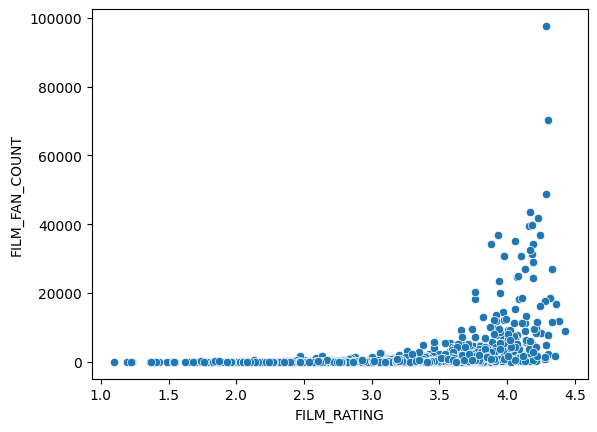

In [98]:
sns.scatterplot(data=df, x='FILM_RATING', y='FILM_FAN_COUNT')

<Axes: xlabel='FILM_WATCH_COUNT', ylabel='Count'>

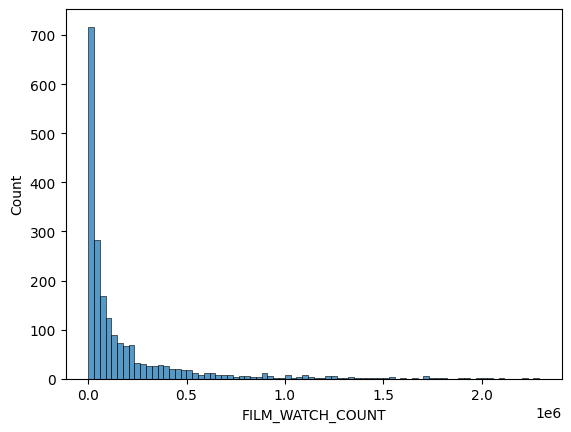

In [79]:
sns.histplot(df['FILM_WATCH_COUNT'])

In [4]:
rating_query = """

SELECT

	 a.FILM_ID
	,c.FILM_TITLE
	,d.FILM_GENRE
	,e.FILM_RATING
	,f.FILM_RATING_SCALED
	,f.FILM_RATING_SCALED - e.FILM_RATING AS RATING_VAR
	,ABS(f.FILM_RATING_SCALED - e.FILM_RATING) AS RATING_ABS_VAR

FROM ALL_FILMS a
LEFT JOIN CONTENT_TYPE b
ON a.FILM_ID = b.FILM_ID
LEFT JOIN FILM_TITLE c
ON a.FILM_ID = c.FILM_ID
LEFT JOIN FILM_GENRE d
ON a.FILM_ID = d.FILM_ID
LEFT JOIN FILM_LETTERBOXD_STATS e
ON a.FILM_ID = e.FILM_ID
LEFT JOIN PERSONAL_RATING f
ON a.FILM_ID = f.FILM_ID

WHERE CONTENT_TYPE = 'movie'
AND f.FILM_RATING_SCALED IS NOT NULL

ORDER BY RATING_VAR DESC
"""
rating_df = select_statement_to_df(rating_query)
rating_df

,FILM_ID,FILM_TITLE,FILM_GENRE,FILM_RATING,FILM_RATING_SCALED,RATING_VAR,RATING_ABS_VAR
0,f_027Vc,Star Wars: Episode I - The Phantom Menace,action,2.82,4.844595,2.024595,2.024595
1,f_01TM6,Jason X,science-fiction,2.21,4.174000,1.964000,1.964000
2,f_027V2,Star Wars: Episode II - Attack of the Clones,action,2.73,4.668919,1.938919,1.938919
3,f_0fBkw,The Nun,thriller,2.18,4.038000,1.858000,1.858000
4,f_0cY7Y,Godzilla: King of the Monsters,science-fiction,2.82,4.601351,1.781351,1.781351
...,...,...,...,...,...,...,...
747,f_01Yye,You've Got Mail,romance,3.44,1.314516,-2.125484,2.125484
748,f_0gnfO,Mamma Mia! Here We Go Again,romance,3.52,1.379032,-2.140968,2.140968
749,f_01QWs,Adulthood,drama,3.04,0.858696,-2.181304,2.181304
750,f_09n98,Me Before You,drama,3.40,1.097826,-2.302174,2.302174


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


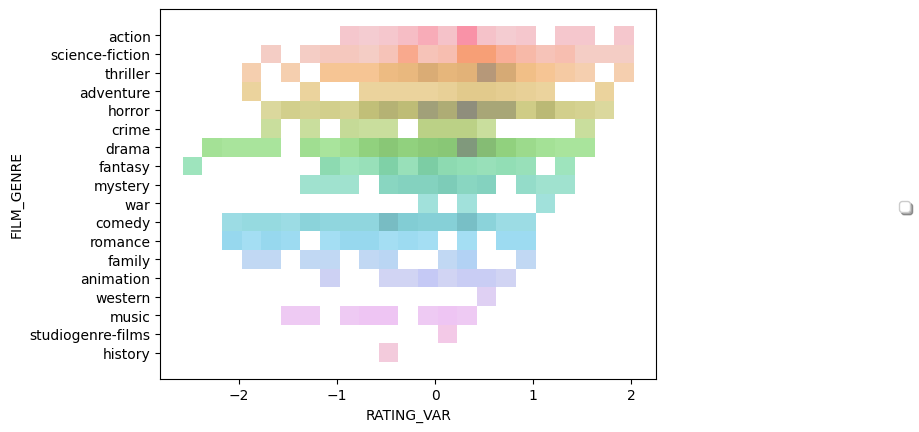

In [71]:
X_plot = np.linspace(0, 5, 100)
Y_plot = X_plot
sns.histplot(data=rating_df, x='RATING_VAR', y='FILM_GENRE', hue='FILM_GENRE', alpha=.66)
# plt.plot(X_plot, Y_plot, color='black', alpha=0.66)
plt.legend(loc='upper center', bbox_to_anchor=(1.5, 0.5), ncol=3, fancybox=True, shadow=True)

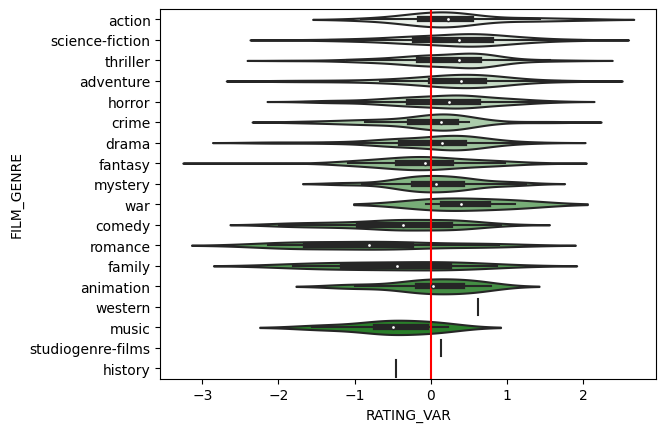

In [80]:
sns.violinplot(data=rating_df, x='RATING_VAR', y='FILM_GENRE', palette="light:g", orient="h")
plt.axvline(0, c='red')

In [19]:
rating_df_genre = rating_df.groupby('FILM_GENRE').agg({'FILM_RATING':'mean', 'FILM_RATING_SCALED':'mean', 'FILM_ID':'count'}).reset_index()
rating_df_genre

,FILM_GENRE,FILM_RATING,FILM_RATING_SCALED,FILM_ID
0,action,3.227857,3.518497,42
1,adventure,3.319565,3.563539,23
2,animation,3.692500,3.704565,16
3,comedy,3.373718,2.957717,78
4,crime,3.369130,3.310380,23
5,drama,3.651981,3.648703,106
6,family,3.151667,2.678337,12
7,fantasy,3.259500,3.140582,40
8,history,3.430000,2.978659,1
9,horror,3.074817,3.229155,164


5

C:\Users\tomdevine\AppData\Local\Temp\ipykernel_13672\3765123099.py:5: UserWarning: 
The palette list has fewer values (12) than needed (18) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=rating_df_genre, x='FILM_RATING', y='FILM_RATING_SCALED', hue='FILM_GENRE', size='FILM_ID', alpha=.66, sizes=(10, 500), palette=sns.color_palette("Paired"))


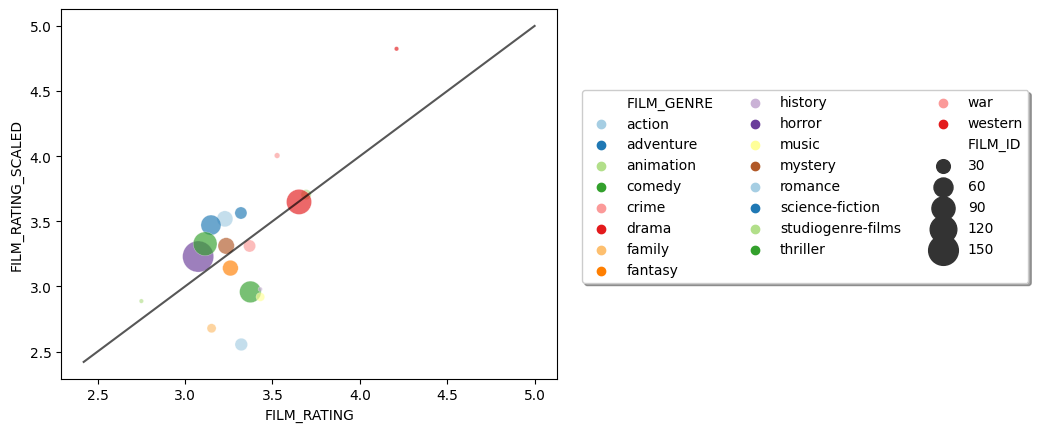

In [59]:
rating_min = int(100 * rating_df_genre[['FILM_RATING', 'FILM_RATING_SCALED']].min().min() * 0.95)/100
rating_max = min(int(100 * rating_df_genre[['FILM_RATING', 'FILM_RATING_SCALED']].max().max() * 1.05)/100, 5)
X_plot = np.linspace(rating_min, rating_max, 100)
Y_plot = X_plot
sns.scatterplot(data=rating_df_genre, x='FILM_RATING', y='FILM_RATING_SCALED', hue='FILM_GENRE', size='FILM_ID', alpha=.66, sizes=(10, 500), palette=sns.color_palette("Paired"))
plt.plot(X_plot, Y_plot, color='black', alpha=0.66)
plt.legend(loc='upper center', bbox_to_anchor=(1.5, 0.8), ncol=3, fancybox=True, shadow=True)